In [12]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
import certifi
from urllib.request import urlopen
import json
import numpy as np
from scipy.stats import kendalltau
import gymnasium as gym
import gym_trading_env

from fin.env.simulator import *
from fin.sdk.data import *
from fin.sdk.momentum import *
from fin.sdk.backtest import *

In [13]:
df = get_historical_stock_df("1day", ["AAPL","VLKPF"], "2020-01-01", "2023-11-10")

In [9]:
simulator = TradingSimulator(df, 100000)
simulator.current_positions

,price,shares,total,position
symbol,,,,
AAPL,74.06,0,0.0,0.0
VLKPF,199.25,0,0.0,0.0
cash,0.01,100000,1000.0,1.0


In [10]:
new_positions = simulator.current_positions.copy()
new_positions.loc["AAPL","position"] = 0.5
new_positions.loc["VLKPF","position"] = 0.5
new_positions.loc["cash","position"] = 0.0
new_positions["position"]

symbol
AAPL     0.5
VLKPF    0.5
cash     0.0
Name: position, dtype: float64

In [11]:
simulator.reposition(new_positions["position"])
simulator.current_positions

,price,shares,total,position
symbol,,,,
AAPL,74.06,7,518.42,0.51842
VLKPF,199.25,2,398.50,0.39850
cash,0.01,8308,83.08,0.08308


In [5]:
df["filtered_close"] = filter_signal(df["close"].values, 365)
ribbons = ribbon(df, "close", range(5,61,5))
df = pd.concat([df, ribbons], axis=1)

NameError: name 'filter_signal' is not defined

In [7]:
ribbon_corrs = ribbon_correlation("close_ma_5", ribbons, 100)

In [8]:
kendalltau_distance_df = ribbon_kendalltau_distance(ribbons)

In [9]:
ribbons["kendalltau_distance"] = kendalltau_distance_df
ribbons

,close_ma_5,close_ma_10,close_ma_15,close_ma_20,close_ma_25,close_ma_30,close_ma_35,close_ma_40,close_ma_45,close_ma_50,close_ma_55,close_ma_60,kendalltau_distance
2007-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-03,74.876972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06,111.299600,108.7268,108.084933,108.6812,109.56316,110.275133,110.644686,111.245225,112.136489,112.77334,113.130400,113.321200,0.863636
2023-11-07,111.915600,109.1828,108.287200,108.5617,109.53436,110.213800,110.592686,111.175975,111.887156,112.69114,113.042582,113.270950,0.848485
2023-11-08,111.619600,109.5268,108.335867,108.4482,109.46076,110.174133,110.512114,111.023725,111.612933,112.54344,112.933036,113.202033,0.833333
2023-11-09,111.839600,110.2538,108.811200,108.6477,109.49036,110.136300,110.533543,110.935975,111.427644,112.41964,112.854309,113.176117,0.803030


In [10]:
buy_sell, buy, sell = kendalltau_buy_sell_triggers(kendalltau_distance_df, 0.001, 0.999)

/Users/ddvlamin/PycharmProjects/myfinrl/fin/sdk/momentum.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  buy_sell = buy_sell.fillna(method='ffill')


In [11]:
df.loc[buy.index]["close"]

2010-08-05    109.500000
2011-11-08    176.000000
2012-08-12    180.160004
2013-05-27    215.000000
2014-11-26    228.740005
2015-12-11    142.770004
2016-05-03    141.250000
2017-01-07    145.259995
2017-09-24    165.600006
2019-10-25    189.250000
2020-05-23    143.750000
2022-01-18    217.920000
Name: close, dtype: float64

In [7]:
env_df = df[["close","open"]].copy()
#env_df.loc[:, "feature_policy"] = buy_sell
env_df

,close,open
2007-08-30,74.876972,74.876972
2007-08-31,74.876972,74.876972
2007-09-01,74.876972,74.876972
2007-09-02,74.876972,74.876972
2007-09-03,74.876972,74.876972
...,...,...
2023-11-06,113.378000,111.460000
2023-11-07,111.280000,112.400000
2023-11-08,110.160000,110.650000
2023-11-09,112.740000,111.410000


In [78]:
current_stock = df.loc[date_object]
positions = pd.DataFrame({"symbol": ["cash", "VLKPF", "AAPL"], "price": [0.01,10,200]})
positions.set_index("symbol", inplace=True)
#pd.merge(positions, current_stock["open"], on="symbol", how="left")
print(current_stock["open"])
positions.loc[current_stock["open"].index, "price"] = current_stock["open"]
positions

symbol
AAPL     183.970
VLKPF    109.948
Name: open, dtype: float64


,price
symbol,
cash,0.010
VLKPF,109.948
AAPL,183.970


In [85]:
for symbol, row in positions.iterrows():
    print(symbol, row["price"])
current_stock.loc["AAPL", "open"]

cash 0.01
VLKPF 109.948
AAPL 183.97


183.97

In [112]:
import pandas as pd

# Assuming df_list is your list of DataFrames
# Each DataFrame has a multi-index with date as the first level
# and symbol as the second level

# Sample DataFrames
df1 = pd.DataFrame({'value': [1, 2], 'value2': [10,20], 'symbol': ['AAPL','AAPL'], 'date': ['2022-11-13 00:00:00', '2022-11-15 00:00:00']})
df2 = pd.DataFrame({'value': [3, 4], 'value2': [30,40], 'symbol': ['GOOGL','GOOGL'], 'date': ['2022-11-13 00:00:00', '2022-11-16 00:00:00']})
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df1.set_index(['date','symbol'], inplace=True)
df2.set_index(['date','symbol'], inplace=True)
df_list = [df1, df2]

# Concatenate DataFrames along the first index (date)
df=pd.concat(df_list)

dts = df.index.get_level_values(0)
date_range = pd.date_range(start=dts.min(), end=dts.max(), freq='D')
new_index = pd.MultiIndex.from_product([date_range,
                                       df.index.get_level_values('symbol').unique()],
                                      names=['date', 'symbol'])



df_reindexed = df.reindex(new_index).groupby('symbol').ffill()
df_reindexed

value  value2
date       symbol               
2022-11-13 AAPL      1.0    10.0
           GOOGL     3.0    30.0
2022-11-14 AAPL      1.0    10.0
           GOOGL     3.0    30.0
2022-11-15 AAPL      2.0    20.0
           GOOGL     3.0    30.0
2022-11-16 AAPL      2.0    20.0
           GOOGL     4.0    40.0

In [42]:
done, truncated = False, False
observation, info = env.reset()
while not done and not truncated:
    # Pick a position by its index in your position list (=[-1, 0, 1])....usually something like : position_index = your_policy(observation)
    #position_index = env.action_space.sample() # At every timestep, pick a random position index from your position list (=[-1, 0, 1])
    if observation[0] == 0:
        position_index = 10
    elif observation[0] == 1:
        position_index = 5
    else:
        position_index = info['position_index']

    #if not np.isnan(observation[0]):
    print(f"on {info['date']}, {'buy' if observation[0] == 0 else 'sell'} @{info['data_close']}")
    observation, reward, done, truncated, info = env.step(position_index)
    print(f"new position {info['position']}, valuation {info['portfolio_valuation']}")
    #else:
    #    observation, reward, done, truncated, info = env.step(position_index)

on 2007-08-30T00:00:00.000000000, sell @74.876971909
new position 0, valuation 1000.0
on 2007-08-31T00:00:00.000000000, sell @74.876971909
new position 0, valuation 1000.0
on 2007-09-01T00:00:00.000000000, sell @74.876971909
new position 0, valuation 1000.0
on 2007-09-02T00:00:00.000000000, sell @74.876971909
new position 0, valuation 1000.0
on 2007-09-03T00:00:00.000000000, sell @74.876971909
new position 0, valuation 1000.0
on 2007-09-04T00:00:00.000000000, sell @74.876971909
new position 0, valuation 1000.0
on 2007-09-05T00:00:00.000000000, sell @74.876971909
new position 0, valuation 1000.0
on 2007-09-06T00:00:00.000000000, sell @74.876971909
new position 0, valuation 1000.0
on 2007-09-07T00:00:00.000000000, sell @74.876971909
new position 0, valuation 1000.0
on 2007-09-08T00:00:00.000000000, sell @74.876971909
new position 0, valuation 1000.0
on 2007-09-09T00:00:00.000000000, sell @74.876971909
new position 0, valuation 1000.0
on 2007-09-10T00:00:00.000000000, sell @74.876971909
n

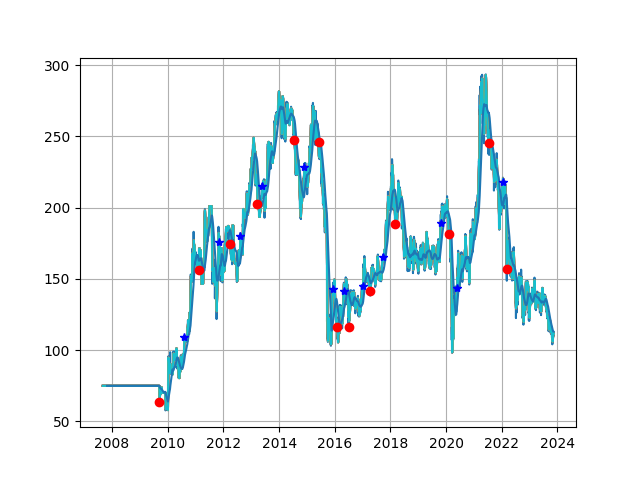

In [103]:
#import ipywidgets as widgets

#with plt.ioff():
#    fig, ax = plt.subplots()

#plt.figure(figsize=(10,5))

fig, ax1 = plt.subplots()


# Plotting the 'date' against 'close'
#plt.plot(df['date'], df['close'], df['date'], df['filtered_close'], df['date'], df['close_ma_10'], df['date'], df['close_ma_30'], df['date'], df['close_ma_50'])

close = df["close"]
dates = df["date"]
ax1.plot(dates, close, dates, df['close_ma_5'], dates, df['close_ma_60'])
ax1.plot(dates[buy_sell == 0], close[buy_sell == 0], "*b")
ax1.plot(dates[buy_sell == 1], close[buy_sell == 1], "or")

#ax2 = ax1.twinx()

#ax2.plot(df['date'], buy_sell, "*")
#ax2.plot(df['date'], ribbon_corrs['close_ma_5_ma_corr_mean'])
#ax2.errorbar(df['date'], ribbon_corrs['close_ma_5_ma_corr_mean'], yerr=ribbon_corrs['close_ma_5_ma_corr_std'], fmt='o', markersize=4, capsize=5, label='Standard Deviation')


# Adding labels and title
#ax.xlabel('Date')
#ax.ylabel('Close')
#ax.title('Close Price Over Time')

# Display the plot
plt.grid(True)

#disconnect_zoom = zoom_factory(ax)
# Enable scrolling and panning with the help of MPL
# Interactions library function like panhandler.
#pan_handler = panhandler(fig)
#display(fig.canvas)
plt.show()

In [ ]:
cash_flow_df = get_cash_flow_statements("VLKPF")

In [18]:

cash_flow_df[["date","freeCashFlow"]]
shifted_cash_flow = cash_flow_df['freeCashFlow'].shift(-1)
cash_flow_df['growth'] = 100*(shifted_cash_flow - cash_flow_df['freeCashFlow']) / (shifted_cash_flow.abs())

In [19]:
cash_flow_df

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,netIncome,depreciationAndAmortization,...,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink,growth
0,2022-12-31,VLKPF,EUR,0000000000,2022-12-31,2022-12-31 00:00:00,2022,FY,22044000000,28485000000,...,-285000000,-9385000000,29738000000,39123000000,28496000000,-22671000000,5825000000,None,None,71.070276
1,2021-12-31,VLKPF,EUR,0000000000,2021-12-31,2021-12-31 00:00:00,2021,FY,20126000000,27336000000,...,942000000,5691000000,39123000000,33432000000,38633000000,-18498000000,20135000000,None,None,-181.411600
2,2020-12-31,VLKPF,EUR,0000000000,2020-12-31,2020-12-31 00:00:00,2020,FY,11667000000,26616000000,...,-745000000,9103000000,33432000000,24329000000,24901000000,-17746000000,7155000000,None,None,-604.583921
3,2019-12-31,VLKPF,EUR,0000000000,2019-12-31,2019-12-31 00:00:00,2019,FY,18356000000,24139000000,...,243000000,-3784000000,24329000000,28113000000,17983000000,-19401000000,-1418000000,None,None,-87.871012
4,2018-12-31,VLKPF,EUR,0000000000,2018-12-31,2018-12-31 00:00:00,2018,FY,15643000000,22391000000,...,-173000000,10075000000,28113000000,18038000000,7272000000,-18963000000,-11691000000,None,None,NaN


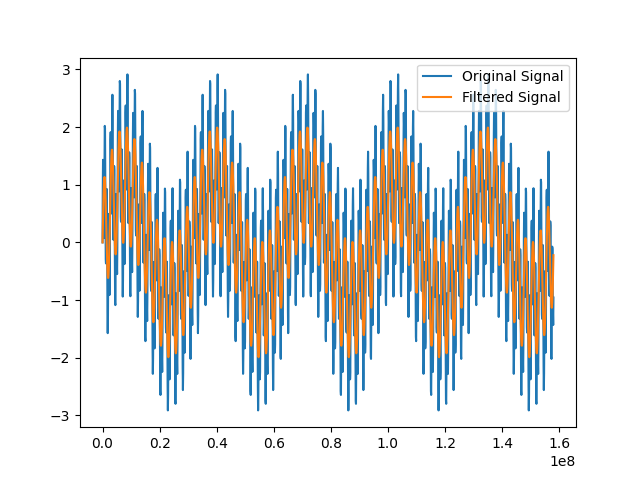